# 16139 인간-컴퓨터 상호작용

### Q)
승재는 인간-컴퓨터 상호작용에서 생체공학 설계를 공부하다가 키보드 자판이 실용적인지 궁금해졌다. 이를 알아보기 위해 승재는 다음과 같은 생각을 했다. 

'문자열에서 특정 알파벳이 몇 번 나타나는지 알아봐서 자주 나타나는 알파벳이 중지나 검지 위치에 오는 알파벳인지 확인하면 실용적인지 확인할 수 있을 것이다.'

승재를 도와 특정 문자열 
$S$, 특정 알파벳 
$\alpha$와 문자열의 구간 
$[l,r]$이 주어지면 
$S$의 
$l$번째 문자부터 
$r$번째 문자 사이에 
$\alpha$가 몇 번 나타나는지 구하는 프로그램을 작성하여라. 승재는 문자열의 문자는 
$0$번째부터 세며, 
$l$번째와 
$r$번째 문자를 포함해서 생각한다. 주의할 점은 승재는 호기심이 많기에 (통계적으로 크게 무의미하지만) 같은 문자열을 두고 질문을 
$q$번 할 것이다.

### Input)
첫 줄에 문자열 
$S$가 주어진다. 문자열의 길이는 
$200,000$자 이하이며 알파벳 소문자로만 구성되었다. 두 번째 줄에는 질문의 수 
$q$가 주어지며, 문제의 수는 
$1\leq q\leq 200,000$을 만족한다. 세 번째 줄부터 
$(q+2)$번째 줄에는 질문이 주어진다. 각 질문은 알파벳 소문자 
$\alpha_i$와 
$0\leq l_i\leq r_i<|S|$를 만족하는 정수 
$l_i,r_i$가 공백으로 구분되어 주어진다.

### Output)
각 질문마다 줄을 구분해 순서대로 답변한다. 
$i$번째 줄에 
$S$의 
$l_i$번째 문자부터 
$r_i$번째 문자 사이에 
$\alpha_i$가 나타나는 횟수를 출력한다.

### Subtask1)
문자열의 길이는 
$2,000$자 이하, 질문의 수는 
$2,000$개 이하이다.

### Source Code)

In [ ]:
from sys import stdin
input = stdin.readline

S = input().strip()
q = int(input())
prefix = [[0 for _ in range(len(S)+1)] for _ in range(ord('z')-ord('a')+1)]

for alpha in S:
    for i in range(len(S)):
        if alpha == S[i]:
            prefix[ord(alpha)-ord('a')][i] = prefix[ord(alpha)-ord('a')][i-1] + 1
        else:
            prefix[ord(alpha)-ord('a')][i] = prefix[ord(alpha)-ord('a')][i-1]

for i in range(q):
    alpha, l, r = input().strip().split()
    l, r = int(l), int(r)
    print(prefix[ord(alpha)-ord('a')][r] - prefix[ord(alpha)-ord('a')][l-1])

누적합을 이용해 문제를 해결하였다.

그림으로 먼저 확인하면 다음과 같다.

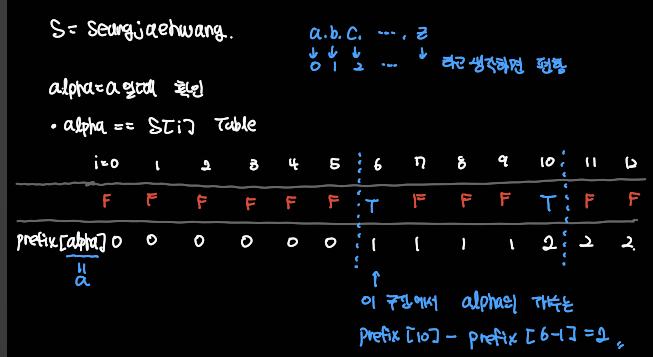

여기서 prefix를 이차원 배열로 선언해주는데 x축은 각 alphabet을 의미한다.
(a -> idx=0, b -> idx=1, ...)
열은 문자열 S에서 현재의 위치를 의미한다.

만약 현재 명령으로 a가 들어갔으면 prefix[a]에 문자열 처음부터 끝까지 돌면서 같은 문자가 나오면 같은행 바로 이전 열의 값 + 1, 다르면 그냥 이전 열의 값을 저장한다.

그 후 l에서 r까지 해당 문자가 몇 개 있었는지 확인하려면 prefix[a][r] - prefix[a][l-1] 을 계산하면 된다.

즉, 누적합 알고리즘을 이용해 계산할 수 있다.